# Introduction


The growth of supermarkets in most populated cities are increasing and market competitions are also high. This dataset is one of the historical sales of supermarket company which has recorded in 3 different City for 3 months data. Predictive data analytics methods are easy to apply with this datasets.

## About Super Market Sales DataSet Variables

* Invoice ID : System generated sales pay slips invoice identification number.
* Branch : Branchs of Super Market (A , B & C).
* City : Locations of branchs of supermarket. 
* Customer type : Types of customers like
                  1. Member (who using the membership card)
                  2. Normal (who is not using the membership card)
* Gender : Gender type of customer.
* Product Line : General products categorized as — Electronic accessories, Fashion accessories, Food and beverages, Health and    beauty, Home and lifestyle, Sports and travel.
* Unit Price : Price of each product.
* Quantity : Number of products purchased by the customer.
* Tax 5% : tax fee.
* Total : Total amount including tax for the product.
* Date :  Purchase Date.
* Time : Purchase Time.
* Payment : Payment method used by the customer (Cash, Credit card and Ewallet).
* Cogs : Cost Of Goods Sold.
* Gross Margin Percentage : **Gross Profit Margin = (Revenue – Cost of Goods Sold) / Revenue x 100**, shows the percentage        ratio of  revenue you keep for each sale after all costs are deducted. It is used to indicate how successful a company is in    generating   revenue, whilst keeping the expenses low.
* Gross Income : Gross Income.
* Rating : Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

## Code for Analysing the Data

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## Display all the columns in a dataframe
pd.pandas.set_option('display.max_columns',None)

In [71]:
# for ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the dataset into the dataframe
supermarket = pd.read_csv(r'supermarket_sales (1).csv')

### Data insight

In [6]:
supermarket.head() # first 5 rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
supermarket.tail() # last 5 rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [8]:
# Shape of the data set
supermarket.shape

(1000, 17)

Above dataset contains 1000 Observations and 17 features

In [9]:
supermarket.info() #information of all the features in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Data preparation and cleaning

In [10]:
# Statistical summary of the dataframe
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [11]:
supermarket.isna().sum() # finding the null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no NaN values in this dataset

In [12]:
supermarket.columns #columns in the dataset

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [13]:
# Renaming the columns in the dataframe
supermarket = supermarket.rename(columns = {'Invoice ID':'Invoice_ID','Customer type':'Customer_type','Product line':'Product_line','Unit price':'Unit_price',
                                           'Tax 5%':'Tax_5%','gross margin percentage':'gross_margin_percentage','gross income':'gross_income'})

In [14]:
supermarket.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [15]:
# Datatype of all the features
supermarket.dtypes

Invoice_ID                  object
Branch                      object
City                        object
Customer_type               object
Gender                      object
Product_line                object
Unit_price                 float64
Quantity                     int64
Tax_5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross_margin_percentage    float64
gross_income               float64
Rating                     float64
dtype: object

### Converting the data types 

As I want year, month, day and hours columns seperatly, I am converting the datatypes of Date and Time features into datetime data type

In [16]:
supermarket['Date'] =pd.to_datetime(supermarket['Date'])

In [17]:
supermarket['Time'] = pd.to_datetime(supermarket['Time'])

In [18]:
supermarket.dtypes

Invoice_ID                         object
Branch                             object
City                               object
Customer_type                      object
Gender                             object
Product_line                       object
Unit_price                        float64
Quantity                            int64
Tax_5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
Rating                            float64
dtype: object

Date and Time columns are converted into datetime types

### Adding Columns

In [19]:
supermarket.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [20]:
supermarket['Year'] = supermarket['Date'].dt.year
supermarket['Month'] = supermarket['Date'].dt.month
supermarket['day'] = supermarket['Date'].dt.day

In [21]:
supermarket['Hour'] = supermarket['Time'].dt.hour

In [22]:
supermarket.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,10


In [23]:
supermarket.describe()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019.0,1.993000,15.256000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.0,0.835254,8.693563,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019.0,1.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019.0,1.000000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019.0,2.000000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019.0,3.000000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019.0,3.000000,31.000000,20.000000


### Let's find which supermarket is more popular with males or females 

In [24]:
# Using groupby function on Gender feature
supermarket.groupby('Gender')['Branch'].value_counts()

Gender  Branch
Female  C         178
        B         162
        A         161
Male    A         179
        B         170
        C         150
Name: Branch, dtype: int64

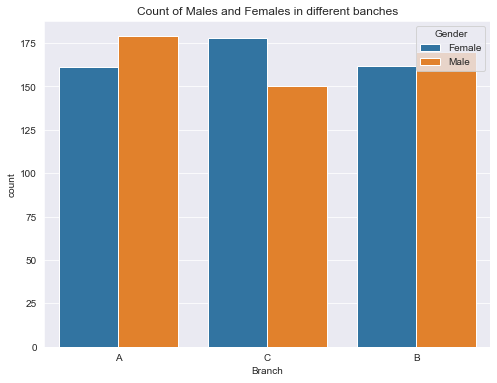

In [25]:
# Count plot
plt.rcParams['figure.figsize'] = [8, 6] # for increasing the size of the figure
sns.set_style("darkgrid")
sns.countplot(x='Branch',hue='Gender',data=supermarket)
plt.title("Count of Males and Females in different banches")
plt.show()

**Observation :** 
* In Branch 'A', Males are most no of customers.
* In Branch 'B', Males are most no of customers.
* In Branch 'C', Females are most no of customers.

### lets find customer rating look like and also on its skewness

In [26]:
supermarket.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating', 'Year', 'Month', 'day', 'Hour'],
      dtype='object')

In [27]:
# finding total no of unique values in Rating feature
supermarket['Rating'].nunique()

61

In [28]:
# finding no of unique values in Rating feature
supermarket['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

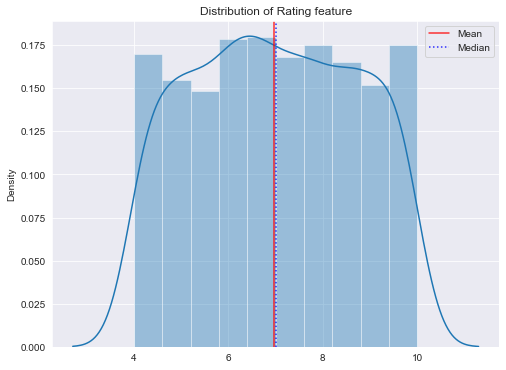

In [37]:
### Distribution of Rating feature
sns.distplot(x=supermarket['Rating'],kde=True)
plt.axvline(x=supermarket['Rating'].mean(),color='red',alpha=0.8,label='Mean')
plt.axvline(x=supermarket['Rating'].median(),ls=':',color='blue',alpha=0.8,label='Median')
plt.title("Distribution of Rating feature")
plt.legend()
plt.show()

In [30]:
supermarket['Rating'].skew()

0.00900964876573073

**Observation :**
        By the above figure, as we can see pdf line is unimodel, mean and medain are almost same and skewness of the Rating feature is between the -0.5 and 0.5. So, we can conculde that Rating feature is ***Normally distributed and it is Symmetric***.

### Sales across the branches

In [31]:
supermarket.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,10


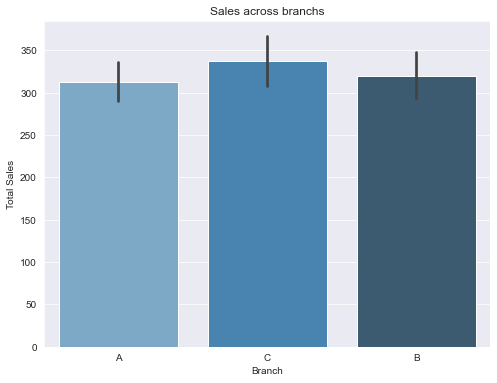

In [36]:
# bar plot
sns.barplot(x='Branch',y='Total',data=supermarket,palette="Blues_d").set_title("Sales across branchs")
plt.ylabel("Total Sales")
plt.show()

Branch 'C' has the highest sales overall, then followed by branch 'B' and branch 'A'.

### Most popular payment method

let's see most popular payment method used by the customer for the payment

In [38]:
supermarket.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating', 'Year', 'Month', 'day', 'Hour'],
      dtype='object')

<AxesSubplot:xlabel='Payment', ylabel='count'>

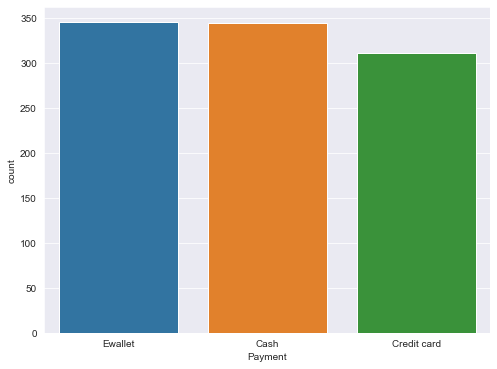

In [46]:
sns.countplot(x='Payment',data=supermarket)

In [48]:
payment_names = supermarket['Payment'].value_counts().index
payment_values = supermarket['Payment'].value_counts().values

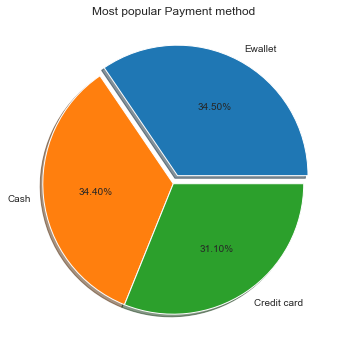

In [60]:
# Pie plot
plt.pie(payment_values,labels=payment_names,autopct = '%1.2f%%',shadow=True,explode=[0.07,0,0])
plt.title("Most popular Payment method")
plt.show()

Most of the customers pay through the Ewallet and Cash Payment while 31.10% of them pay with through their credit card.

### Does gross income affect customer ratings? 

In [61]:
supermarket.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating', 'Year', 'Month', 'day', 'Hour'],
      dtype='object')

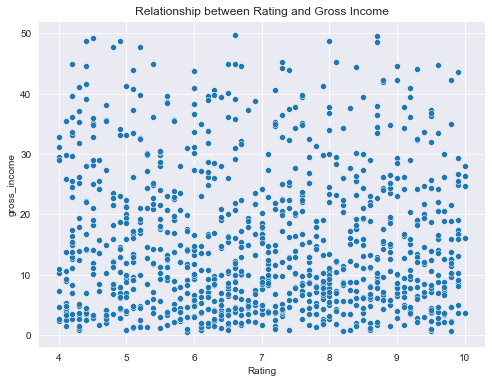

In [70]:
# scatter plot
sns.scatterplot(x='Rating',y='gross_income',data=supermarket).set_title('Relationship between Rating and Gross Income')
plt.show()

In [69]:
supermarket['Rating'].corr(supermarket['gross_income'])

-0.03644170499701836

By the above plot and the correlation between Rating and Gross income is -0.03. So, the corr() value is nearly equal to 0 then there is no relationship between Rating and Gross income.<br>
Thus, Gross income doesn't effect customer ratings.

## let's find Which is the most profitable branch


In [89]:
p = supermarket.groupby('Branch')['gross_margin_percentage'].sum()

In [86]:
p

Branch
A    4.761905
B    4.761905
C    4.761905
Name: gross_margin_percentage, dtype: float64

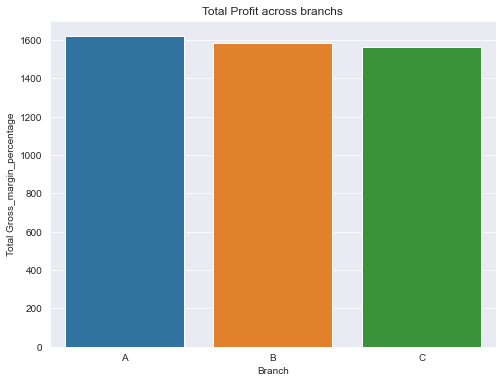

In [94]:
sns.barplot(x=p.index,y=p.values,data=supermarket).set_title("Total Profit across branchs")
plt.ylabel('Total Gross_margin_percentage')
plt.show()

Branch 'A' has the highest profit, Branch 'B' has the second highest profit and followed by branch 'C'.

### Relationship between Gender and Gross income? 

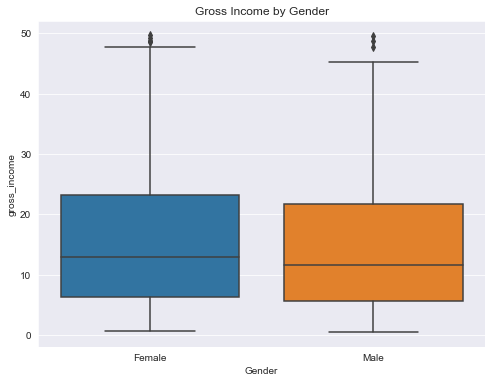

In [95]:
# box plot
sns.boxplot(x='Gender',y='gross_income',data=supermarket).set_title('Gross Income by Gender')
plt.show()

**Observation :**<br>
    Females has produced the highest gross income when compared to males.

 ### Time trend in gross income

In [97]:
supermarket.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating', 'Year', 'Month', 'day', 'Hour'],
      dtype='object')

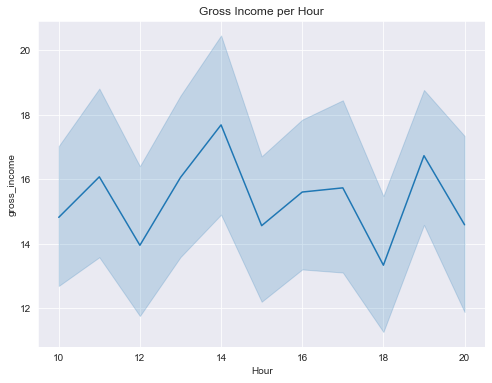

In [100]:
# line plot
sns.lineplot(x='Hour',y='gross_income',data=supermarket).set_title('Gross Income per Hour')
plt.show()

*Most of the income is generated around 14.00 Hrs local time*

### let's find Which product line helps to generate the most income

In [106]:
res = supermarket.groupby('Product_line').sum()
res

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour
Product_line,,,,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,343230,348,2759,2548
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,359382,346,2717,2680
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,351306,348,2645,2677
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,306888,312,2373,2260
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,323040,324,2287,2312
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,335154,315,2475,2433


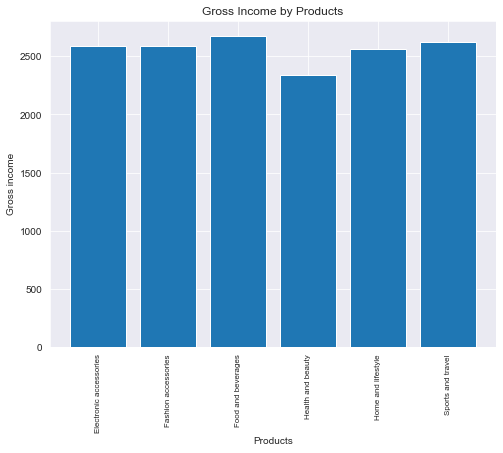

In [111]:
products = [product for product,df in supermarket.groupby('Product_line')]

plt.bar(products,res['gross_income'])
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Gross income')
plt.title('Gross Income by Products')
plt.show()

From the above image shows the top product line item type sold in the given datase.***Food and beverages*** is highest and ***Health and beauty*** is the lowest.

### Males and Females in which category do they spend more

In [126]:
supermarket.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating', 'Year', 'Month', 'day', 'Hour'],
      dtype='object')

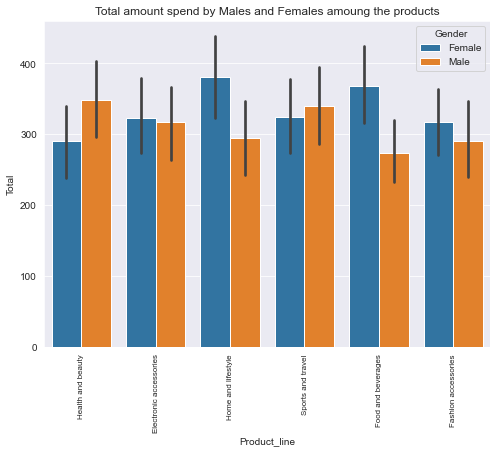

In [137]:
sns.barplot(x='Product_line',y='Total',hue='Gender',data=supermarket).set_title('Total amount spend by Males and Females amoung the products')
plt.xticks(rotation='vertical',size=8)
plt.show()

From the above figure, ***Females spent more amount on Home and lifestyle and Males spent more amount on Health and beauty***

### How many products are bought by customers

In [150]:
supermarket.groupby('Product_line')['Quantity'].sum().sum()

5510

Total of 5510 products are bought by the customers. Let see which product line are sold most

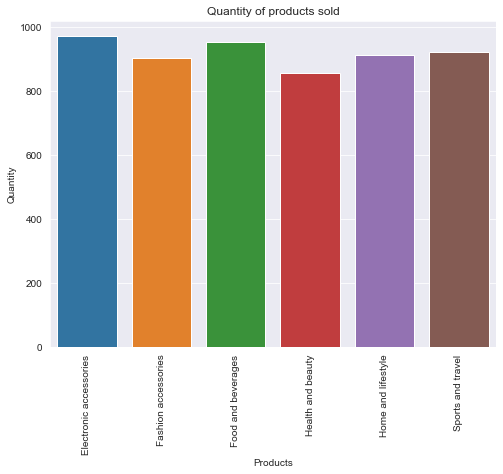

In [154]:
quantity_index = supermarket.groupby('Product_line')['Quantity'].sum().index
quantity_values = supermarket.groupby('Product_line')['Quantity'].sum().values

sns.barplot(x=quantity_index,y=quantity_values,data=supermarket).set_title('Quantity of products sold')
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

Electronic accessories products are bought by the most no of customers, Health and beauty products are bought by less no of customers

### Which day of the week has maximum sales

In [160]:
# creating a new column to identiy the day in a week
supermarket['Day_in_week'] = supermarket['Date'].dt.dayofweek

In [168]:
# number's refers to 0-Monday,1-Tuesday,2-Wednesday,3-Thursday,4-Friday,5-Saturday,6-Sunday
supermarket.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour,Day_in_week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,13,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,20,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,10,4


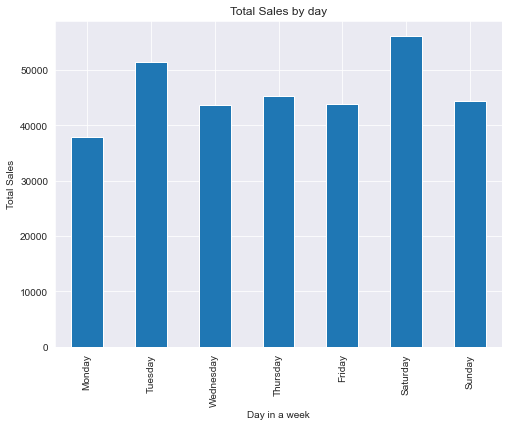

In [178]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

supermarket.groupby('Day_in_week')['Total'].sum().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6],days)
plt.xlabel('Day in a week')
plt.ylabel('Total Sales')
plt.title('Total Sales by day')
plt.show()

From the above figure, ***Saturday*** *has the highest no of sales in a week where as* ***Monday*** *has the lowest no of sales in a week*. Because Saturday is a holiday for most of the people so the sales are high, Monday is the first week day so most of the people will go to work so, the sales are low.

### Which hour of the day is busiest

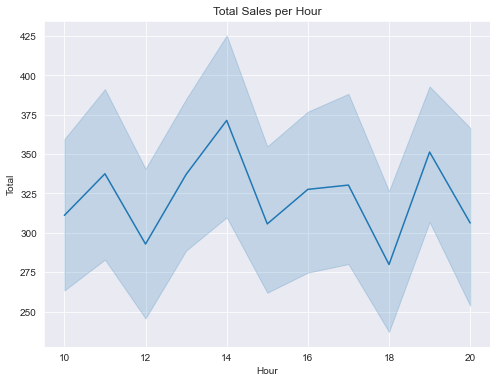

In [179]:
# line plot
sns.lineplot(x='Hour',y='Total',data=supermarket).set_title('Total Sales per Hour')
plt.show()

*Most of the Sales are generated around 14.00 Hrs local time*. So it is the busiest hour in a day

### Which product line should your supermarket focus on

In [181]:
supermarket.groupby('Product_line').sum()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour,Day_in_week
Product_line,,,,,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,343230,348,2759,2548,496
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,359382,346,2717,2680,560
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,351306,348,2645,2677,521
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,306888,312,2373,2260,407
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,323040,324,2287,2312,525
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,335154,315,2475,2433,523


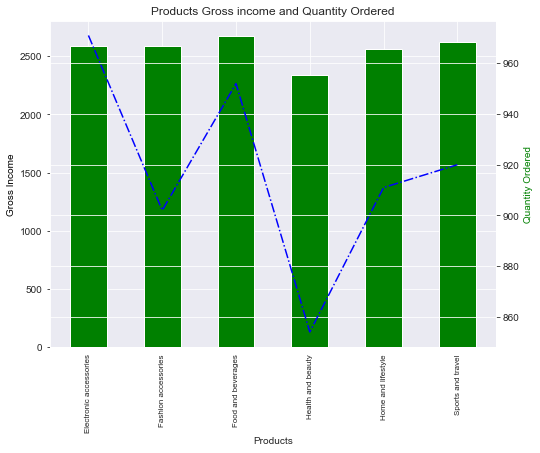

In [183]:
products = [product for product,df in supermarket.groupby('Product_line')]

# Adding 2 y axis in same graph
# x- products , 1 y - Gross Income , 2 y - Quantity 
product_group = supermarket.groupby('Product_line')
quantity_ordered = product_group.sum()['Quantity']
gross_income = supermarket.groupby('Product_line').mean()['gross_income']
fig ,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, res['gross_income'],color='g' ,width=0.5)
ax2.plot(products, quantity_ordered, 'b-.')

ax1.set_xlabel('Products')
ax1.set_ylabel('Gross Income', color='black')
ax2.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.title('Products Gross income and Quantity Ordered')
plt.show()

***Health and beauty*** products are less ordered by the customers and the Gross Income generated by this product is also low. So, Supermarket managers should focus more on this item to increase its sales and gross income.

### Which city should be chosen for expansion and what products should be focussed on

In [184]:
supermarket.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Year,Month,day,Hour,Day_in_week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,13,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,20,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,10,4


<AxesSubplot:xlabel='City'>

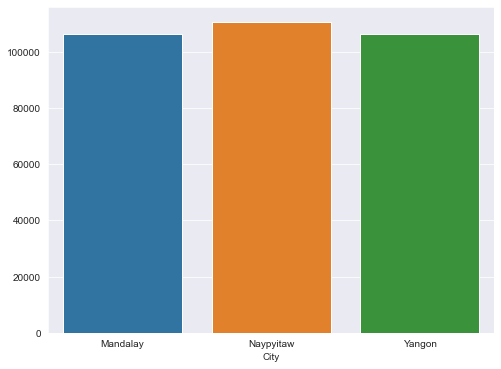

In [194]:
s = supermarket.groupby('City')['Total'].sum()
sns.barplot(x=s.index,y=s.values)

<AxesSubplot:xlabel='City', ylabel='Total'>

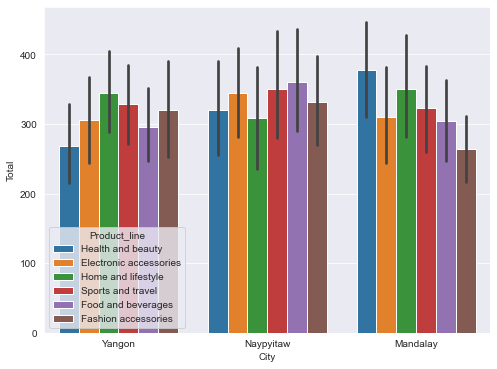

In [197]:
sns.barplot(x='City',y='Total',hue='Product_line',data=supermarket)

From the above figures, ***Yangon and Mandalay*** are very close to sales and they are less when compared to Naypyitaw City.
So, Supermarket owners should focus on both the cities for expansion and they can mostly focus to increase the sales of Electronic accessories, Food and Beverages to increase their income because now a days these are daily items which are used by the customers.